<a href="https://colab.research.google.com/github/khairihr/MachineLearning/blob/main/TaskWeek5/EDA_Penjualan_Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Dataset MachineLearning/supermarket_sales.csv')

# Tampilkan beberapa baris awal dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
# Menampilkan informasi dasar tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [23]:
# Statistik deskriptif
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

<Axes: title={'center': 'Distribusi Total'}, ylabel='Frequency'>

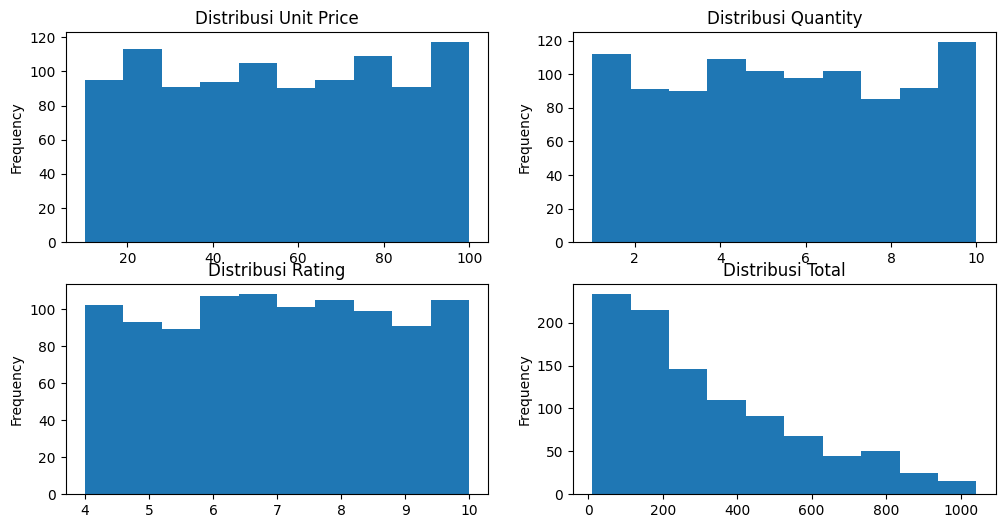

In [24]:
# Melihat sebaran (distribution) dari beberapa kolom numerik
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
df['Unit price'].plot(kind='hist', title='Distribusi Unit Price')
plt.subplot(2, 2, 2)
df['Quantity'].plot(kind='hist', title='Distribusi Quantity')
plt.subplot(2, 2, 3)
df['Rating'].plot(kind='hist', title='Distribusi Rating')
plt.subplot(2, 2, 4)
df['Total'].plot(kind='hist', title='Distribusi Total')

<Axes: title={'center': 'Distribusi Product Line'}>

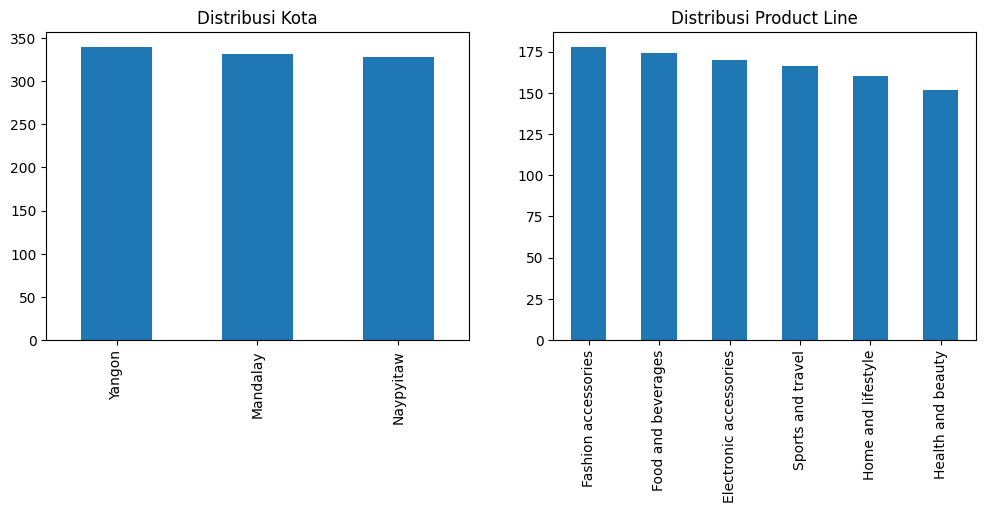

In [25]:
# Melihat sebaran data pada kolom kategori
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['City'].value_counts().plot(kind='bar', title='Distribusi Kota')
plt.subplot(1, 2, 2)
df['Product line'].value_counts().plot(kind='bar', title='Distribusi Product Line')


Text(0.5, 1.0, 'Hubungan antara Rating dan Total')

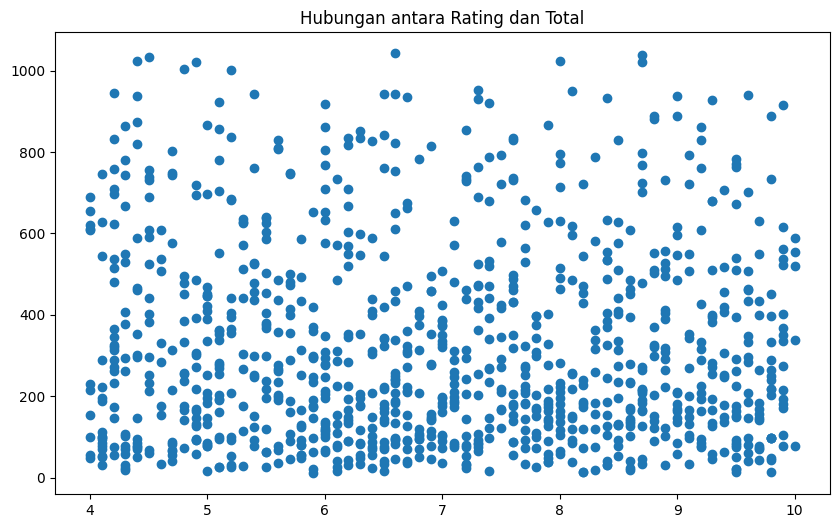

In [26]:
# Melihat hubungan antara variabel
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Total'])
plt.title('Hubungan antara Rating dan Total')

<ipython-input-27-def677254ecb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Heatmap Korelasi')

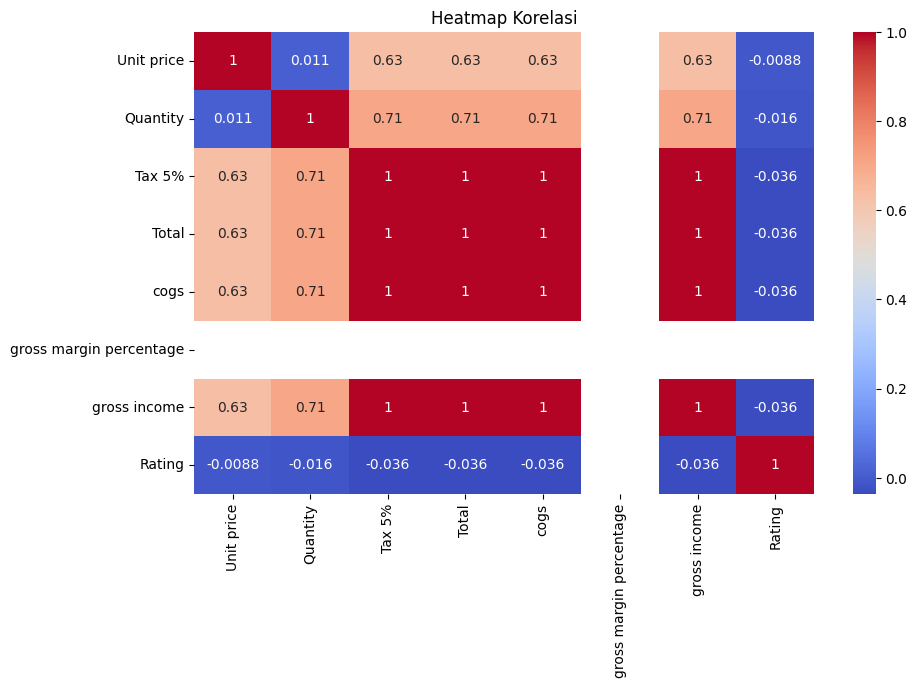

In [27]:
plt.figure(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')

In [28]:
# Menampilkan beberapa statistik berdasarkan kelompok
grouped = df.groupby('Branch')['Total'].mean()
print(grouped)

Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64


<Axes: >

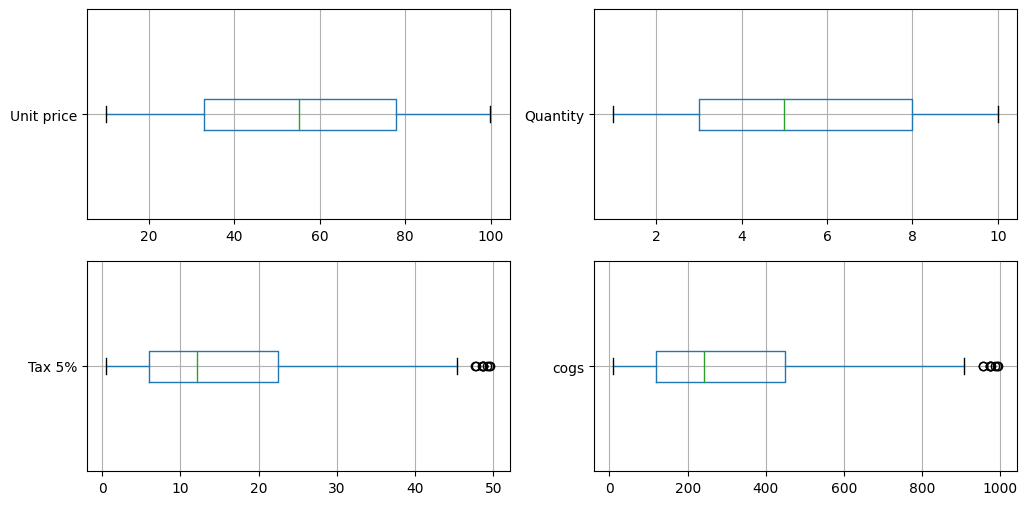

In [29]:
# Box plot untuk melihat distribusi kolom numerik
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
df.boxplot(column='Unit price', vert=False)
plt.subplot(2, 2, 2)
df.boxplot(column='Quantity', vert=False)
plt.subplot(2, 2, 3)
df.boxplot(column='Tax 5%', vert=False)
plt.subplot(2, 2, 4)
df.boxplot(column='cogs', vert=False)

Text(0.5, 0, 'Hari dalam Seminggu')

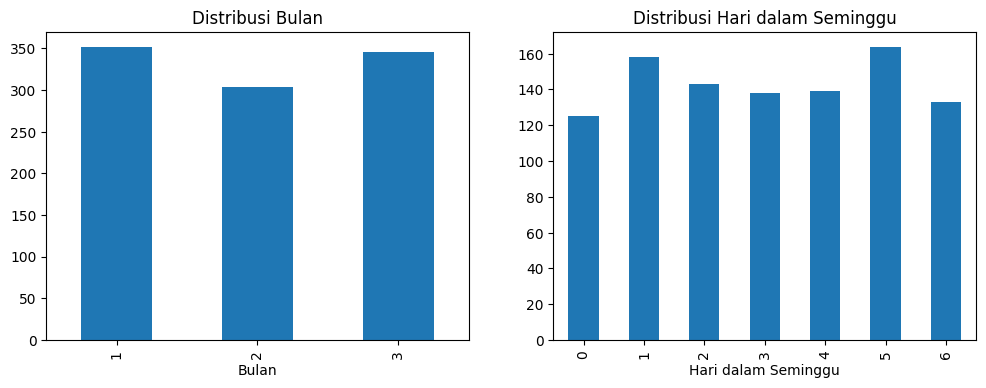

In [30]:
# Analisis tanggal dan waktu
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['Date'].dt.month.value_counts().sort_index().plot(kind='bar', title='Distribusi Bulan')
plt.xlabel('Bulan')
plt.subplot(1, 2, 2)
df['Date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', title='Distribusi Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')

In [31]:
# Analisis gender
gender_sales = df.groupby('Gender')['Total'].sum()
print("\nTotal Penjualan berdasarkan Gender:")
print(gender_sales)

plt.show()


Total Penjualan berdasarkan Gender:
Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


<Axes: xlabel='Total'>

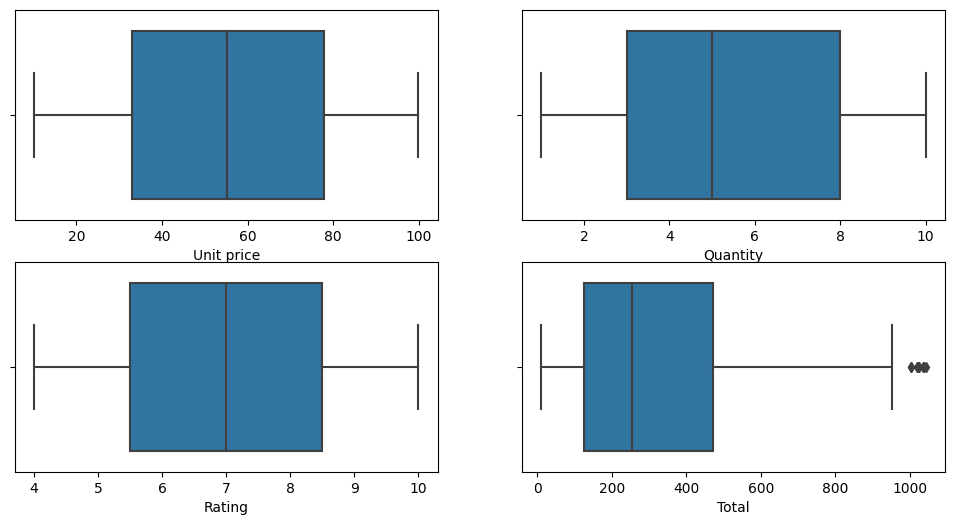

In [33]:
# Analisis Outliers
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Unit price', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Quantity', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Rating', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Total', data=df)

Text(0.5, 0, 'Customer Type')

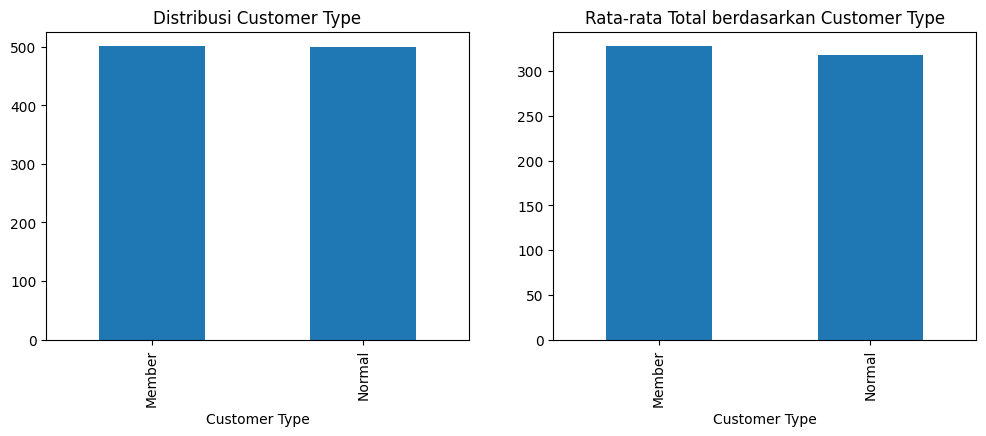

In [34]:
#Analisis Lebih Lanjut untuk Kategori
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['Customer type'].value_counts().plot(kind='bar', title='Distribusi Customer Type')
plt.xlabel('Customer Type')
plt.subplot(1, 2, 2)
df.groupby('Customer type')['Total'].mean().plot(kind='bar', title='Rata-rata Total berdasarkan Customer Type')
plt.xlabel('Customer Type')

In [36]:
# Visualisasi Interaktif
# Contoh visualisasi interaktif dengan Plotly
import plotly.express as px
fig = px.scatter(df, x='Total', y='Rating', color='City', size='Quantity', hover_data=['Product line'])
fig.update_layout(title='Visualisasi Interaktif')
fig.show()

In [37]:
# Analisis Regresi (contoh regresi sederhana)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df[['Unit price']]
y = df['Total']
model.fit(X, y)
print("\nKoefisien Regresi (Unit price -> Total):", model.coef_)


Koefisien Regresi (Unit price -> Total): [5.8835315]
